# reduce

In [61]:

from guang.Utils.toolsFunc import probar
import os
import librosa
def reduce_from_duration(filelist, least_time=3):
    """
    return: reduce_list, reduced_list, IDX
    """
    reduce_list = []
    reduced_list = []
    IDX = []
    for idx, i in probar(filelist):
        try:
            if librosa.get_duration(filename = i) < least_time:
                reduce_list.append(i)
            else:
                reduced_list.append(i)
                IDX.append(idx)
        except:
            print(f'file {i} open failed, and has been ignored')
            continue
    print(F'The number that need to be deleted:{len(reduce_list)}')
    return reduce_list, reduced_list, IDX

    
        
if __name__ == "__main__":
    from glob import glob
    flist = glob(r"data/*")
#     print(flist)
    _, l, _ = reduce_from_duration(flist)
    print(l)

100.00% 	0'2.0"|0'2.0"	Expect:12-29 0:52:40 	The number that need to be deleted:17
['data\\000003.wav', 'data\\000005.wav', 'data\\000006.wav', 'data\\000009.wav', 'data\\000011.wav', 'data\\000016.wav', 'data\\000017.wav', 'data\\000018.wav', 'data\\000019.wav', 'data\\000020.wav', 'data\\000022.wav', 'data\\000026.wav', 'data\\000030.wav']


In [64]:
%%writefile reduce.py
from multiprocessing import Pool, TimeoutError
import os
import librosa
from glob import glob

def is_lt_duration(file, least_time):
    try:
        if librosa.get_duration(filename = file) < least_time:
            return 1
        else:
            return 0
    except:
        print(f'file {i} open failed, and has been ignored')
#         return None

def reduce_from_duration(filelist, least_time=1):
    '''
    return reduced list
    '''
    with Pool(processes=None) as pool:
        multi_res=[pool.apply_async(is_lt_duration, (i,least_time)) for i in filelist]
        reduce_list = [res.get() for res in multi_res]
        
    return [filelist[idx] for idx,i in enumerate(reduce_list) if i==0]


import time
if __name__ == "__main__":
    t1=time.time()
    flist = glob(r"data/*")
    l = reduce_from_duration(flist, least_time=3)
    print(l)
    print(time.time()- t1)

Overwriting reduce.py


In [63]:
!python reduce.py

['data\\000003.wav', 'data\\000005.wav', 'data\\000006.wav', 'data\\000009.wav', 'data\\000011.wav', 'data\\000016.wav', 'data\\000017.wav', 'data\\000018.wav', 'data\\000019.wav', 'data\\000020.wav', 'data\\000022.wav', 'data\\000026.wav', 'data\\000030.wav']
2.7940330505371094


# silence

In [4]:
from guang.Utils.jupyter import reload

In [12]:
import guang

In [13]:
reload(guang.Voice.music)

In [8]:
from guang.Voice.music import listen
import librosa
from glob import glob
from guang.Voice.music import voiceshow
import numpy as np

In [9]:
files = glob(r'data/*')
voice, sr = librosa.load(files[0], sr=None)

In [48]:
listen(voice[:], sr)

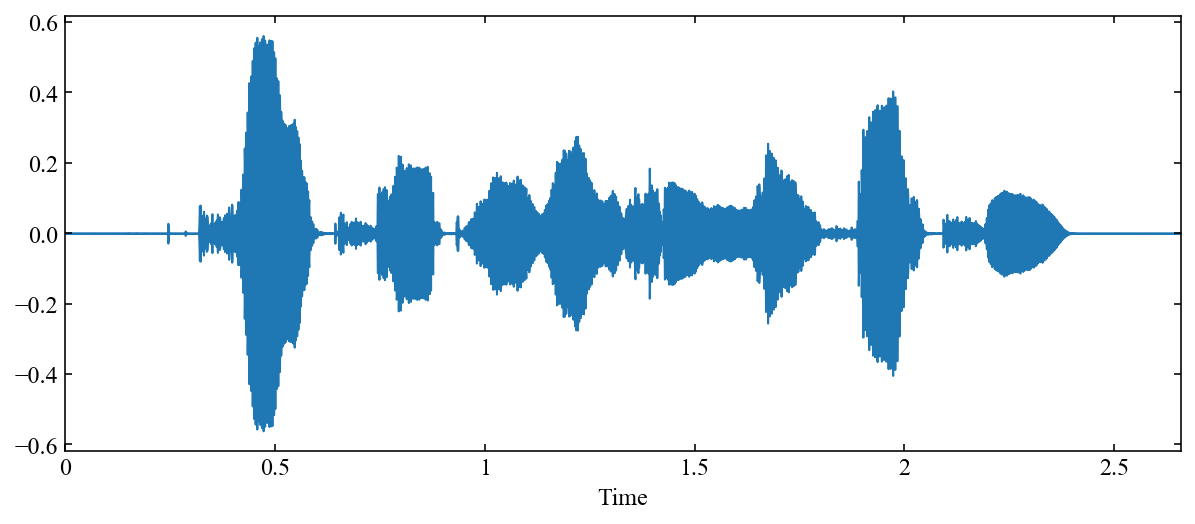

In [14]:
voiceshow(voice, sr)

start: 0.279
end: 2.39

In [279]:
# %%writefile silence.py
import soundfile as sf
import numpy as np
import warnings

def find_no_silence(filename):
    """read the sound file, return you the voice start end voice end.
    
    Return:
        start(/s), end(/s), arg_start, arg_end
    """
    warnings.filterwarnings('ignore')
    voice, sr = sf.read(filename)
#     diff = np.diff(voice, n=2)
#     print(diff)
#     plt.plot(diff)
#     print(np.argwhere(diff>1e-4))
    argvoice = np.argwhere(np.log(voice, )>-6)
    a= argvoice/sr
    win = 15
    for i in range(len(a)):
        if abs(np.mean(a[i:i+win])-a[i]) < 1e-3:
            start = a[i]
            arg_start = argvoice[i]
            break

    for i in range(-1, -len(a), -1):
        if abs(np.mean(a[i-win:i])-a[i]) < 1e-3:
            end = a[i-win]
            arg_end = argvoice[i-win]
            break
    
    return start[0], end[0], arg_start[0], arg_end[0]

Writing silence.py


find_no_silence(files[0])

In [277]:
%%time
start, end, arg_start, arg_end = find_no_silence(files[1])
print(start, end)

0.31035416666666665 2.6242708333333336
Wall time: 8.97 ms


In [278]:
voice, sr=sf.read(files[1])
listen(voice[arg_start: arg_end], sr)      

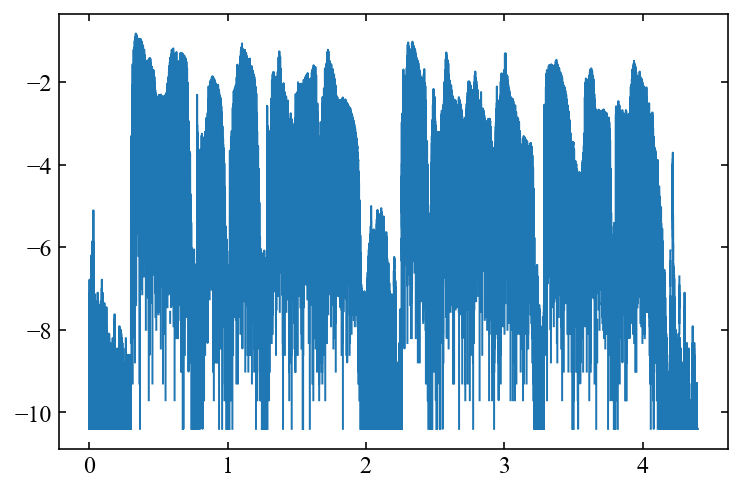

In [268]:
plt.plot(np.arange(len(voice))/sr,np.log(voice))

In [ ]:
from guang.Voice.silence 